In [74]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [75]:
PUIdata = os.getenv('PUIDATA')
print(PUIdata)

/home/cusp/yc3300/PUIdata


In [77]:
!wget https://data.cityofnewyork.us/api/views/erm2-nwe9/rows.csv?accessType=DOWNLOAD

--2017-11-12 09:22:57--  https://data.cityofnewyork.us/api/views/erm2-nwe9/rows.csv?accessType=DOWNLOAD
Resolving data.cityofnewyork.us... 52.206.140.205
Connecting to data.cityofnewyork.us|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: “rows.csv?accessType=DOWNLOAD.1”

    [                   <=>              ] 10,945,039,017 4.43M/s   in 37m 54s 

Last-modified header invalid -- time-stamp ignored.
2017-11-12 10:00:51 (4.59 MB/s) - “rows.csv?accessType=DOWNLOAD.1” saved [10945039017]



In [78]:
os.system('mv rows.csv?accessType=DOWNLOAD ' + PUIdata)

0

In [79]:
!mv $PUIDATA/rows.csv?accessType=DOWNLOAD $PUIDATA/311data.csv

In [274]:
df = pd.read_csv(PUIdata + "/311data.csv")
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32159845,12/08/2015 10:50:06 PM,12/08/2015 11:01:27 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10024,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.789615,-73.973609,"(40.789614901346546, -73.9736085726657)"
1,32159846,12/08/2015 01:46:00 PM,12/10/2015 01:30:00 PM,DOT,Department of Transportation,Traffic Signal Condition,Vehicle Signal,NaN,11691,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.593321,-73.772713,"(40.593320648977645, -73.77271336808198)"
2,32159847,12/08/2015 04:23:24 PM,12/08/2015 08:28:35 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10453,1660 ANDREWS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848560,-73.919118,"(40.84855984187605, -73.91911817593288)"
3,32159848,12/08/2015 07:44:26 PM,12/08/2015 11:20:53 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10468,2461 DAVIDSON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.863187,-73.901949,"(40.86318677236925, -73.90194938707823)"
4,32159849,12/08/2015 10:43:28 AM,12/08/2015 11:21:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10036,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.755807,-73.986403,"(40.75580743192962, -73.98640311324542)"


In [275]:
df.columns

Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',

In [276]:
df = pd.DataFrame(df, columns = [['Complaint Type','Incident Zip','Location Type']])
df.head()

,Complaint Type,Incident Zip,Location Type
0,Noise - Residential,10024,Residential Building/House
1,Traffic Signal Condition,11691,NaN
2,Noise - Residential,10453,Residential Building/House
3,Noise - Residential,10468,Residential Building/House
4,Noise - Street/Sidewalk,10036,Street/Sidewalk


In [277]:
#df['closetime'] = pd.to_datetime(df['Closed Date'])-pd.to_datetime(df['Created Date'])
# df['closetime'] = (pd.to_datetime(df['Closed Date'])-pd.to_datetime(df['Created Date'])).dt.seconds / 3600.

In [278]:
df = df.dropna(subset = ['Incident Zip'])

In [279]:
df['Incident Zip'] = pd.to_numeric(df['Incident Zip'],errors = 'coerce')

In [280]:
df.groupby('Complaint Type')['Incident Zip'].count()

Complaint Type
AGENCY                                    8
APPLIANCE                             85202
ATF                                     429
Adopt-A-Basket                          503
Advocate - Lien                           1
Advocate - Other                         79
Advocate - RPIE                           4
Advocate-Business Tax                     3
Advocate-Co-opCondo Abatement            41
Advocate-Commercial Exemptions           10
Advocate-Personal Exemptions            378
Advocate-Prop Class Incorrect             6
Advocate-Prop Refunds/Credits            31
Advocate-Property Value                  23
Advocate-SCRIE/DRIE                      13
Advocate-UBT                              5
Agency Issues                             1
Air Quality                           57407
Alzheimer's Care                       2097
Animal Abuse                          38295
Animal Facility - No Permit             541
Animal in a Park                      13056
Asbestos         

### Because there are too many comlaint types, I will only be looking into "Noise complaint" on different zip code distributions

In [281]:
df = df[df['Complaint Type'] == 'Traffic']
df

,Complaint Type,Incident Zip,Location Type
532,Traffic,10022.0,Street/Sidewalk
533,Traffic,10016.0,Street/Sidewalk
677,Traffic,10463.0,Street/Sidewalk
1307,Traffic,11101.0,Street/Sidewalk
1456,Traffic,11414.0,Highway
2020,Traffic,10454.0,Street/Sidewalk
2032,Traffic,10065.0,Street/Sidewalk
2054,Traffic,11432.0,Street/Sidewalk
2229,Traffic,10022.0,Street/Sidewalk
2230,Traffic,10305.0,Street/Sidewalk


In [288]:
type(df)

pandas.core.frame.DataFrame

In [286]:
df1 = df.groupby('Incident Zip')['Complaint Type'].count().reset_index() #The Complaint Type will be the count of complaint on traffic within that zipcode area
df1

,Incident Zip,Complaint Type
0,10000.0,20
1,10001.0,363
2,10002.0,353
3,10003.0,183
4,10004.0,176
5,10005.0,31
6,10006.0,80
7,10007.0,87
8,10009.0,88
9,10010.0,182


In [149]:
import shapely
from shapely import geometry
import collections
import geopandas as gp
from fiona.crs import from_epsg
    
!curl -O https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip
os.system(PUIdata + 'unzip -d application\%2Fzip')
zipsNYC = gp.GeoDataFrame.from_file(PUIdata + "/ZIP_CODE_040114.shp")
zipsNYC.crs = from_epsg(2263) 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   194    0   194    0     0    194      0 --:--:-- --:--:-- --:--:--  1065


In [294]:
zipsNYC['ZIP'] = pd.to_numeric(zipsNYC.ZIPCODE)

In [296]:
df2 = zipsNYC.merge(df1, left_on='ZIP', right_on='Incident Zip')
df2.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,ZIP,Incident Zip,Complaint Type
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",11436,11436.0,40
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",11213,11213.0,96
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",11212,11212.0,85
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,...",11225,11225.0,105
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,...",11218,11218.0,248


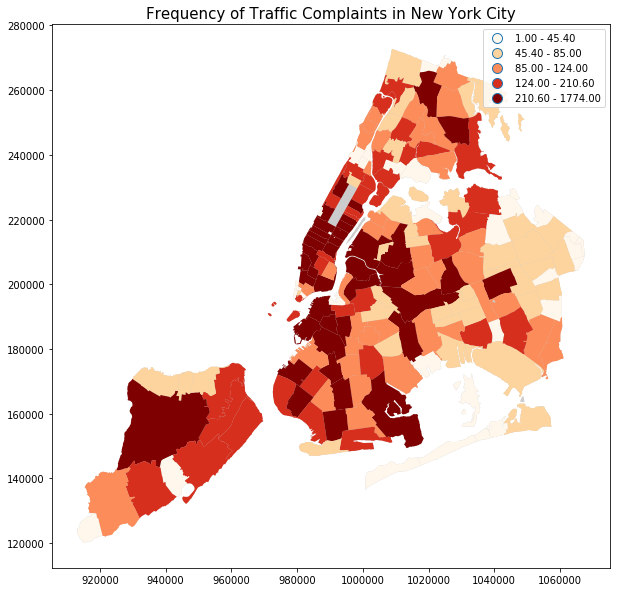

In [303]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
zipsNYC.plot(ax=ax, color = 'black',alpha=0.2)
df2.plot(ax=ax, column = 'Complaint Type', cmap = 'OrRd', scheme = 'quantiles', legend = True)
pl.title('Number of 311 Traffic Complaints in New York City',size = 15)

### Fig.1 Number of 311 Traffic Complaints in New York City
This map shows the number of 311 traffic complaints people have filed in different areas/zipcodes. Apparently, Manhattan has the highest number of 311 traffic complanits due to high demand in transportation and high population. But surprisingly we have found out that Staten Island also has a high number of compalint on traffic. 